In [1]:
# view PE coeff

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tables
import h5py
from scipy.spatial.distance import pdist, squareform

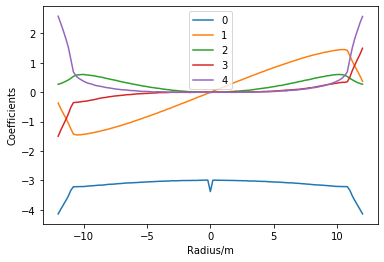

In [2]:
def findfile(radius):
    filename = '../coeff_pe/5kt_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff)[:]
    expect = np.array(h.root.mean)[:]
    predict = np.array(h.root.predict)[:]
    h.close()
    return coeff, expect, predict
coeff = [];
expect = [];
predict = [];
for i in np.arange(12,-12.2,-0.2):
    file_str = '%+.2f' % i
    a1,a2,a3 = findfile(file_str)
    coeff.append(a1)
    expect.append(a2)
    predict.append(a3)
pe_coeff = np.array(coeff)
radius = np.arange(12,-12.2,-0.2)
plt.plot(radius, pe_coeff)
plt.xlabel('Radius/m')
plt.ylabel('Coefficients')

plt.legend(range(5))
plt.show()

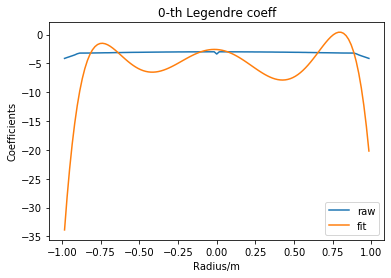

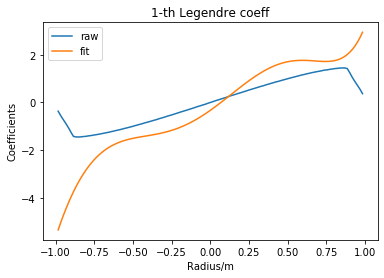

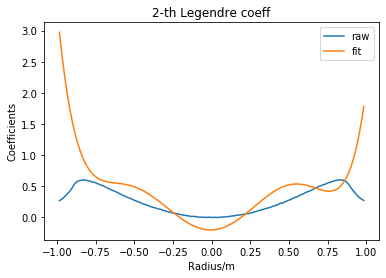

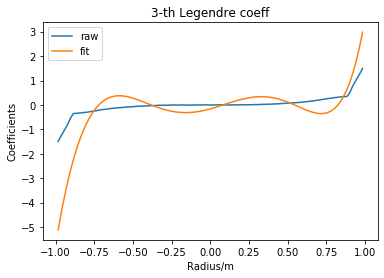

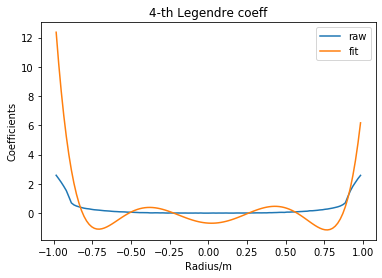

In [3]:
k1 = np.zeros((5,7))
radius = np.arange(12,-12.2,-0.2)
for i in np.arange(np.size(pe_coeff[0])):
    data = np.nan_to_num(pe_coeff[:,i])
    x = radius/12.2
    plt.plot(x, data)
    '''
    a = np.polyfit(x, data, 8)
    print(a)
    b = np.poly1d(a)
    c = b(x)
    plt.plot(x,c)'''
    c = np.polynomial.legendre.legfit(x, data, 6)
    plt.plot(x, np.polynomial.legendre.legval(x,c))

    plt.xlabel('Radius/m')
    plt.ylabel('Coefficients')
    plt.title(str(i)+'-th Legendre coeff')
    plt.legend(['raw','fit'])
    plt.show()
    

[ 0.03756191  1.83644132 -0.18135986]


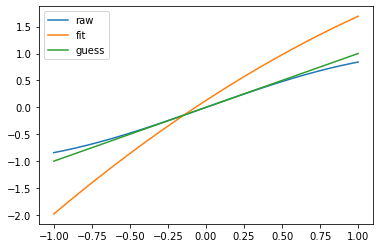

In [131]:
x = np.linspace(-1,1,1000)
y = np.sin(x)
plt.plot(x,y)
c = np.polynomial.legendre.legfit(x, y, 2)
print(c)
plt.plot(x, np.polynomial.legendre.legval(x,c))
plt.plot(x, np.polynomial.legendre.legval(x,[0,1,0]))
plt.legend(['raw','fit','guess'])

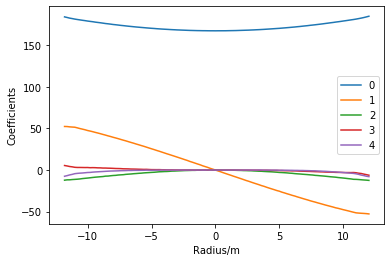

In [91]:
def findfile(radius):
    filename = '../coeff_time/5kt_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff)[:]
    h.close()
    return coeff
coeff = [];
for i in np.arange(12,-12,-0.2):
    file_str = '%+.2f' % i
    coeff.append(findfile(file_str))

time_coeff = np.array(coeff)
radius = np.arange(12,-12,-0.2)
plt.plot(radius, time_coeff)
plt.xlabel('Radius/m')
plt.ylabel('Coefficients')
plt.legend(range(5))
plt.show()

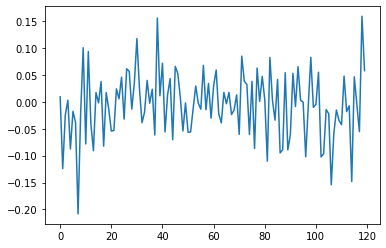

In [78]:
plt.plot(time_coeff[:,3])